In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-02-27 12:28:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  51.3KB/s    in 1.4s    

2019-02-27 12:28:41 (51.3 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
df = pd.read_csv("FuelConsumption.csv")

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [9]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


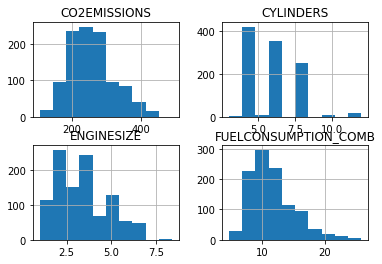

In [10]:
cdf.hist()
plt.show()

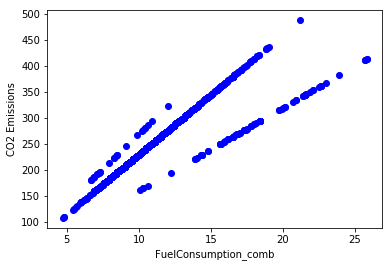

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FuelConsumption_comb")
plt.ylabel("CO2 Emissions")
plt.show()

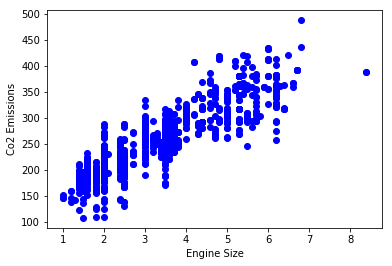

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

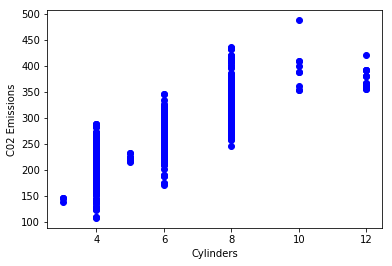

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color= 'blue')
plt.xlabel("Cylinders")
plt.ylabel("C02 Emissions")
plt.show()

In [18]:
msk = np.random.rand(len(df))<0.8

In [19]:
msk

array([ True,  True, False, ..., False, False,  True])

In [20]:
train =cdf[msk]
test = cdf[~msk]

In [21]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,1.5,4,5.9,136
6,3.5,6,10.1,232
9,2.4,4,9.2,212
12,5.9,12,15.6,359
13,5.9,12,15.6,359
15,4.7,8,15.4,354
17,4.7,8,15.4,354
20,2.0,4,10.0,230
27,3.0,6,8.3,224
30,3.0,6,11.2,258


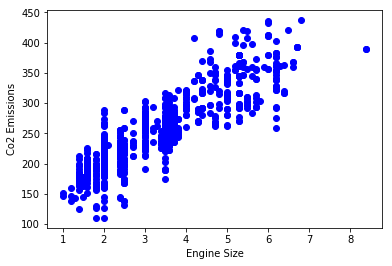

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print('Coefficients:', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients: [[38.79362355]]
Intercept:  [125.77605866]


Text(0,0.5,'Emission')

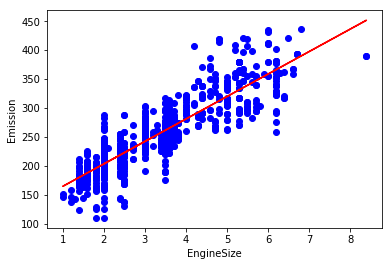

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("EngineSize")
plt.ylabel("Emission")

In [33]:
from sklearn.metrics import r2_score
test_x= np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [34]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.63
Residual sum of squares (MSE): 1022.29
R2-score: 0.64
